In [7]:
# The goal of C1 is to turn the numerical financial analysis into clear, easy-to-understand visual charts so that non-technical users can understand spending behavior at a glance.
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Personal_Finance_Dataset_CLEANED.csv")

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Type"] = df["Type"].str.strip().str.lower()

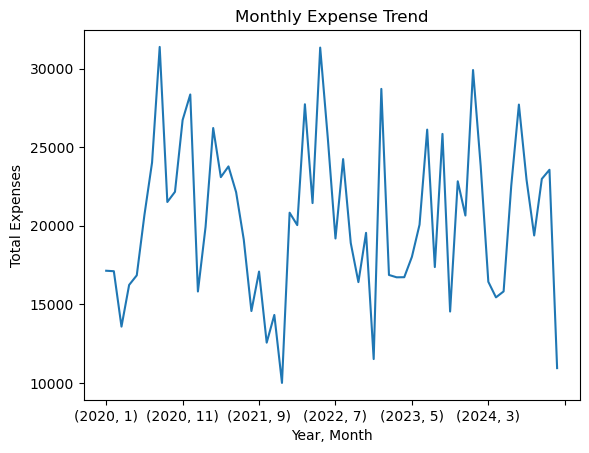

In [9]:
monthly_expenses = (
    df[df["Type"] == "expense"]
    .groupby(["Year", "Month"])["Amount"]
    .sum()
    .abs()
)

plt.figure()
monthly_expenses.plot()
plt.title("Monthly Expense Trend")
plt.xlabel("Year, Month")
plt.ylabel("Total Expenses")
plt.show()

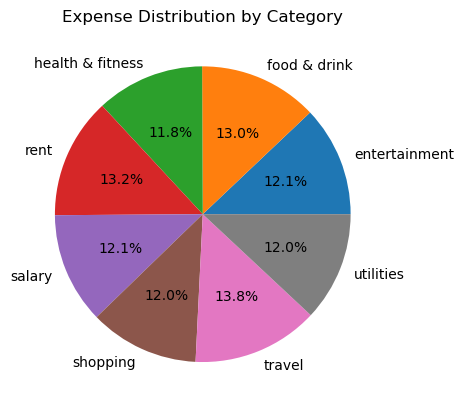

In [10]:
category_expenses = (
    df[df["Type"] == "expense"]
    .groupby("Category")["Amount"]
    .sum()
    .abs()
)

plt.figure()
category_expenses.plot(kind="pie", autopct="%1.1f%%")
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.show()

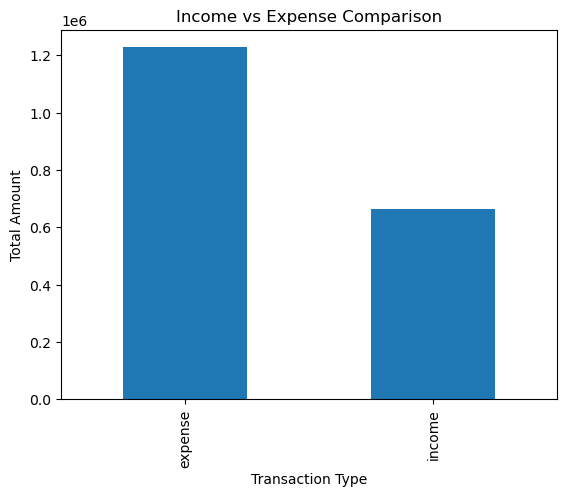

In [11]:
income_vs_expense = (
    df.groupby("Type")["Amount"]
    .sum()
    .abs()
)

plt.figure()
income_vs_expense.plot(kind="bar")
plt.title("Income vs Expense Comparison")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.show()

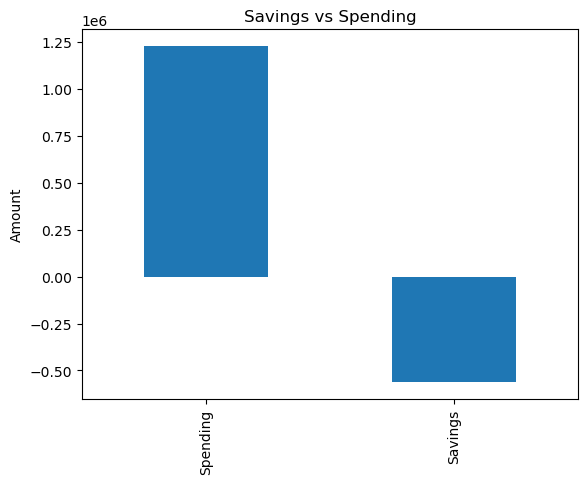

In [12]:
total_income = df[df["Type"] == "income"]["Amount"].sum()
total_expenses = abs(df[df["Type"] == "expense"]["Amount"].sum())
savings = total_income - total_expenses

savings_vs_spending = pd.Series(
    {"Spending": total_expenses, "Savings": savings}
)

plt.figure()
savings_vs_spending.plot(kind="bar")
plt.title("Savings vs Spending")
plt.ylabel("Amount")
plt.show()